# CNN - CIFAR10 - Data Augmentation

## Loading the packages

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.08
set_session(tf.Session(config=config))

import numpy as np
from matplotlib import pyplot as pl
from PIL import Image

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn import metrics as me



%matplotlib inline

Using TensorFlow backend.


Define a function to plot some images from CIFAR

In [2]:
def show_imgs(X):
    pl.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pl.subplot2grid((4,4),(i,j))
            pl.imshow(Image.fromarray(X[k]))
            k = k+1
    # show the plot
    pl.show()

## Loading the raw data
First load the `cifar10` dataset, flatten the pixel values into a vector and normalize all values to be in the range [0, 1]

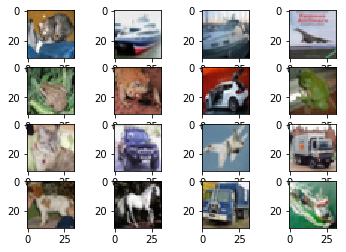

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)
50000 train samples
10000 test samples


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test[:16])  #shows the first 16 images of the test set
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [14]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. Follow the structure given in the exercise 1.

In [25]:
cnn = Sequential() 

cnn.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32,(3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(32,(3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(n_classes))
cnn.add(Activation('softmax'))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 16, 16, 32)        0         
__________

## Compile and train the network

When compiling the model, we need to specify the loss function, the optimizer and the metrics we want to track during the training. In Keras, we need to call the methods `compile()` and `fit()`. We will train through E epochs, using batches of size B, as specified in the exercise 1.

- The `categorical_crossentropy` loss is relevant for multiclass, single-label classification problem. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used `binary_crossentropy`.
- The `adam` optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is defining the update rule for the weights of the neurons during backpropagation gradients.

In [16]:
B = 128
E = 10
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
log = cnn.fit(X_train,Y_train,batch_size=B,epochs=E,verbose=1,validation_data=(X_test,Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.5563 - acc: 0.4427 - val_loss: 1.3513 - val_acc: 0.5234
Epoch 2/10
50000/50000 [==============================] - 9s 181us/step - loss: 1.2034 - acc: 0.5773 - val_loss: 1.1074 - val_acc: 0.6129
Epoch 3/10
50000/50000 [==============================] - 8s 162us/step - loss: 1.0535 - acc: 0.6339 - val_loss: 1.0159 - val_acc: 0.6506
Epoch 4/10
50000/50000 [==============================] - 8s 155us/step - loss: 0.9558 - acc: 0.6694 - val_loss: 0.9600 - val_acc: 0.6713
Epoch 5/10
50000/50000 [==============================] - 8s 154us/step - loss: 0.8914 - acc: 0.6918 - val_loss: 0.9226 - val_acc: 0.6756
Epoch 6/10
50000/50000 [==============================] - 8s 159us/step - loss: 0.8456 - acc: 0.7082 - val_loss: 0.9005 - val_acc: 0.6837
Epoch 7/10
50000/50000 [==============================] - 8s 160us/step - loss: 0.8020 - acc: 0.7216 - val_loss: 0.9243 -

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

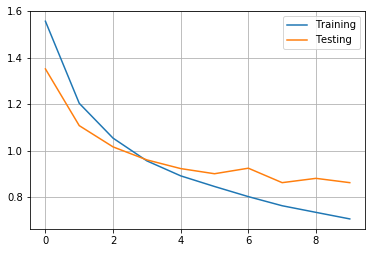

In [17]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

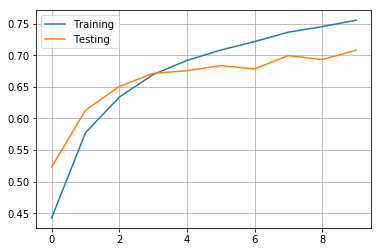

In [18]:
pl.plot(log.history['acc'], label='Training')
pl.plot(log.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [19]:
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 2s 170us/step
Test loss: 0.8621002991676331
Test accuracy: 0.708


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [20]:
pred = cnn.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 2s 158us/step


array([[703,  11,  92,  38,  13,  10,  15,   9,  69,  40],
       [ 33, 735,  16,  16,   2,  10,  13,   3,  25, 147],
       [ 42,   2, 617,  79,  93,  58,  68,  21,   7,  13],
       [  7,   2,  79, 571,  61, 182,  62,  19,   9,   8],
       [ 19,   1,  74,  88, 664,  41,  53,  49,   7,   4],
       [ 10,   1,  64, 169,  46, 648,  20,  34,   4,   4],
       [  2,   1,  47,  89,  34,  27, 795,   3,   2,   0],
       [ 13,   0,  52,  54,  71,  77,   5, 716,   2,  10],
       [ 66,  20,  22,  26,   6,  12,  12,   2, 801,  33],
       [ 36,  34,  13,  25,   6,  14,   9,  12,  21, 830]])

## Data Augmentation

Overfitting can be caused by having networks with too many parameters that are trained on too few samples. Through training, the model learns *by hart* and generalizes poorly.

**Data augmentation** takes the approach of generating artificially more training data from existing training samples. For images, data augmentation is performed via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will not see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ```ImageDataGenerator``` instance.

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.

In [38]:
from keras.preprocessing.image import ImageDataGenerator

cnnD = Sequential() 

cnnD.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
cnnD.add(Activation('relu'))
cnnD.add(Conv2D(32,(3,3), padding='same'))
cnnD.add(Activation('relu'))
cnnD.add(MaxPooling2D(pool_size=(2,2)))

cnnD.add(Conv2D(32,(3,3), padding='same'))
cnnD.add(Activation('relu'))
cnnD.add(MaxPooling2D(pool_size=(2,2)))

cnnD.add(Flatten())
cnnD.add(Dense(n_classes))
cnnD.add(Activation('softmax'))

gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08)

batches = gen.flow(X_train,Y_train,batch_size=B)
val_batches = gen.flow(X_test,Y_test,batch_size=B)


In [47]:
cnnD.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
logD = cnnD.fit_generator(batches,steps_per_epoch=50000//32,
                        epochs=E,
                        validation_data=val_batches,
                        validation_steps=10000//32,
                        use_multiprocessing=True)

Epoch 1/10
1562/1562 [==============================] - 107s 68ms/step - loss: 0.6931 - acc: 0.7591 - val_loss: 0.7706 - val_acc: 0.7383
Epoch 2/10
1562/1562 [==============================] - 108s 69ms/step - loss: 0.6774 - acc: 0.7644 - val_loss: 0.7656 - val_acc: 0.7416
Epoch 3/10
1562/1562 [==============================] - 108s 69ms/step - loss: 0.6622 - acc: 0.7697 - val_loss: 0.7507 - val_acc: 0.7417
Epoch 4/10
 245/1562 [===>..........................] - ETA: 1:15 - loss: 0.6522 - acc: 0.7755

Process Process-26:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/data_utils.py", line 680, in _data_generator_task
    time.sleep(self.wait_time)
KeyboardInterrupt


KeyboardInterrupt: 

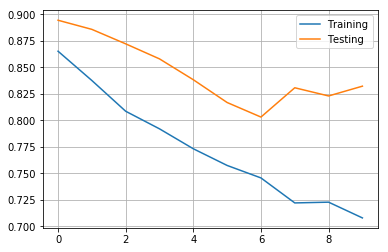

In [44]:
pl.plot(logD.history['loss'], label='Training')
pl.plot(logD.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

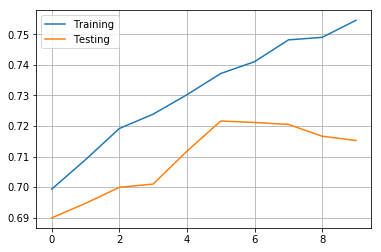

In [45]:
pl.plot(logD.history['acc'], label='Training')
pl.plot(logD.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

In [46]:
loss_test, metric_test = cnnD.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 1s 137us/step
Test loss: 0.8017534983634949
Test accuracy: 0.733


### Table of results

Describe your data augmentation strategies here.

| CNN | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  No DA | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | ...  | ... |
|  With DA v1 | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | ...  | ... |
|  With DA v2 | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | ...  | ... |
| ... | | | |

In [49]:
# Exercice 2 - Visualisation of activations

NameError: name 'cnn' is not defined

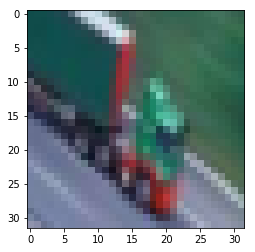

In [4]:
from keras import models

# choose image
img = X_train[50]
pl.imshow(img.reshape(32,32,3),cmap='Greys',interpolation='none')
# extracs the output of the first layer
layer_conv = cnn.layers[0].output
# creates a model able to return these outputs, given an input
activation_model = models.Model(inputs=cnn.input,outputs=layer_conv)
# reshape
img = img.reshape(1,32,32,3)
# returns the layer activation
layer_activation = activation_model.predict(img)
# display activations of the layer
fig = pl.figure()
rows = 4
columns = 8
for i in range(32):
    fig.add_subplot(rows, columns, i+1)
    pl.imshow(layer_activation[0,:,:,i],cmap='Greys')

pl.show()

# NOT finished
